In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\akars\Downloads\adult.csv',na_values=['#NAME?'])

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [6]:
df['income']= [0 if i == '<=50K' else  1 for i in df['income'] ]

In [7]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [8]:
X=df.drop('income',1)
y=df.income

In [9]:
## Data cleaning 
# Creating dummy features for categorical and ordinal variables. For exanmple
print(pd.get_dummies(X['education']).head())



   10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  Assoc-voc  \
0     0     1     0        0        0        0    0           0          0   
1     0     0     0        0        0        0    0           0          0   
2     0     0     0        0        0        0    0           1          0   
3     0     0     0        0        0        0    0           0          0   
4     0     0     0        0        0        0    0           0          0   

   Bachelors  Doctorate  HS-grad  Masters  Preschool  Prof-school  \
0          0          0        0        0          0            0   
1          0          0        1        0          0            0   
2          0          0        0        0          0            0   
3          0          0        0        0          0            0   
4          0          0        0        0          0            0   

   Some-college  
0             0  
1             0  
2             0  
3             1  
4             1  


In [10]:
for name in X.columns:
    if X[name].dtypes=='object':
        unique_cat=len(X[name].unique())
        print(f"feature {name} has {unique_cat} unique categories")

feature workclass has 9 unique categories
feature education has 16 unique categories
feature marital-status has 7 unique categories
feature occupation has 15 unique categories
feature relationship has 6 unique categories
feature race has 5 unique categories
feature gender has 2 unique categories
feature native-country has 42 unique categories


In [11]:
X['education'].value_counts().sort_values(ascending=False)

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [12]:
X['native-country'].value_counts().sort_values(ascending=False) # Majority values are in US. 

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [13]:
X['native-country'] = ['United-States ' if i == 'United-States' else 'Other' for i in X['native-country'] ]


In [14]:
X['native-country'].value_counts().sort_values(ascending=False)

United-States     43832
Other              5010
Name: native-country, dtype: int64

In [15]:
# creating list of features to dummy
dummy_list = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country']
def dummy_df(df,dummy_list):
    for x in dummy_list:
        dummies =  pd.get_dummies(df[x],prefix=x,dummy_na=False)
        df=df.drop(x,1)
        df=pd.concat([df,dummies],axis=1)
    return df
    

In [16]:
X= dummy_df(X,dummy_list)

In [17]:
print(X.head(5))

   age  fnlwgt  educational-num  capital-gain  capital-loss  hours-per-week  \
0   25  226802                7             0             0              40   
1   38   89814                9             0             0              50   
2   28  336951               12             0             0              40   
3   44  160323               10          7688             0              40   
4   18  103497               10             0             0              30   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0            0                      0                    0   
1            0                      0                    0   
2            0                      0                    1   
3            0                      0                    0   
4            1                      0                    0   

   workclass_Never-worked  ...  relationship_Wife  race_Amer-Indian-Eskimo  \
0                       0  ...                  0                        0

In [18]:
X.isnull().sum().sort_values(ascending=False).head()

native-country_United-States     0
education_Bachelors              0
education_1st-4th                0
education_5th-6th                0
education_7th-8th                0
dtype: int64

In [19]:
X.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed', 'occupation_?',
       'occupatio

In [20]:
### using imputer just in case if there were missing values. In this case there was none anyway.
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values= np.nan, strategy= 'median')
imp.fit(X)
X= pd.DataFrame(data=imp.transform(X),columns = X.columns)

In [21]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male,native-country_Other,native-country_United-States
0,25.0,226802.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,38.0,89814.0,9.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,28.0,336951.0,12.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,44.0,160323.0,10.0,7688.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,18.0,103497.0,10.0,0.0,0.0,30.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [22]:
# Outlier detection with IQR

def find_outliers(x):
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    iqr=q3-q1
    floor=q1-1.5*iqr
    ceiling= q3+1.5*iqr
    outlier_indices=list(x.index[(x<floor)|(x>ceiling)])
    outlier_values=list(x[outlier_indices])
    
    return outlier_indices,outlier_values

In [23]:
indices,values=find_outliers(X['age'])
print (np.sort(values))

[79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79.
 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 79. 80. 80. 80. 80. 80. 80.
 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80.
 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 80. 81. 81. 81. 81.
 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81.
 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 81. 82. 82. 82.
 82. 82. 82. 82. 82. 82. 82. 82. 82. 82. 82. 82. 83. 83. 83. 83. 83. 83.
 83. 83. 83. 83. 83. 84. 84. 84. 84. 84. 84. 84. 84. 84. 84. 84. 84. 84.
 85. 85. 85. 85. 85. 86. 87. 87. 87. 88. 88. 88. 88. 88. 88. 89. 89. 90.
 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.
 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.
 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.]


In [24]:
#Outlier detection using Kernel Density Estimation

from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate
def find_outliers_kde(x):
    x_scaled = scale(list(map(float,x)))
    kde=KDEUnivariate(x_scaled)
    kde.fit(bw="scott",fft=True)
    pred=kde.evaluate(x_scaled)
    
    n=sum(pred<0.05)
    outlier_ind=np.asarray(pred).argsort()[:n]
    outlier_value=np.asarray(x)[outlier_ind]
    
    return outlier_ind,outlier_value

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

In [26]:
def myhist(x):
    plt.hist(x, color = 'green', alpha = 0.5)
    plt.title(f"{x.name}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

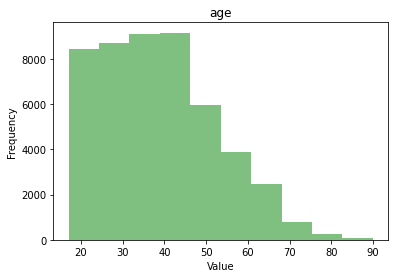

In [27]:
myhist(X['age'])

In [28]:
import seaborn as sns

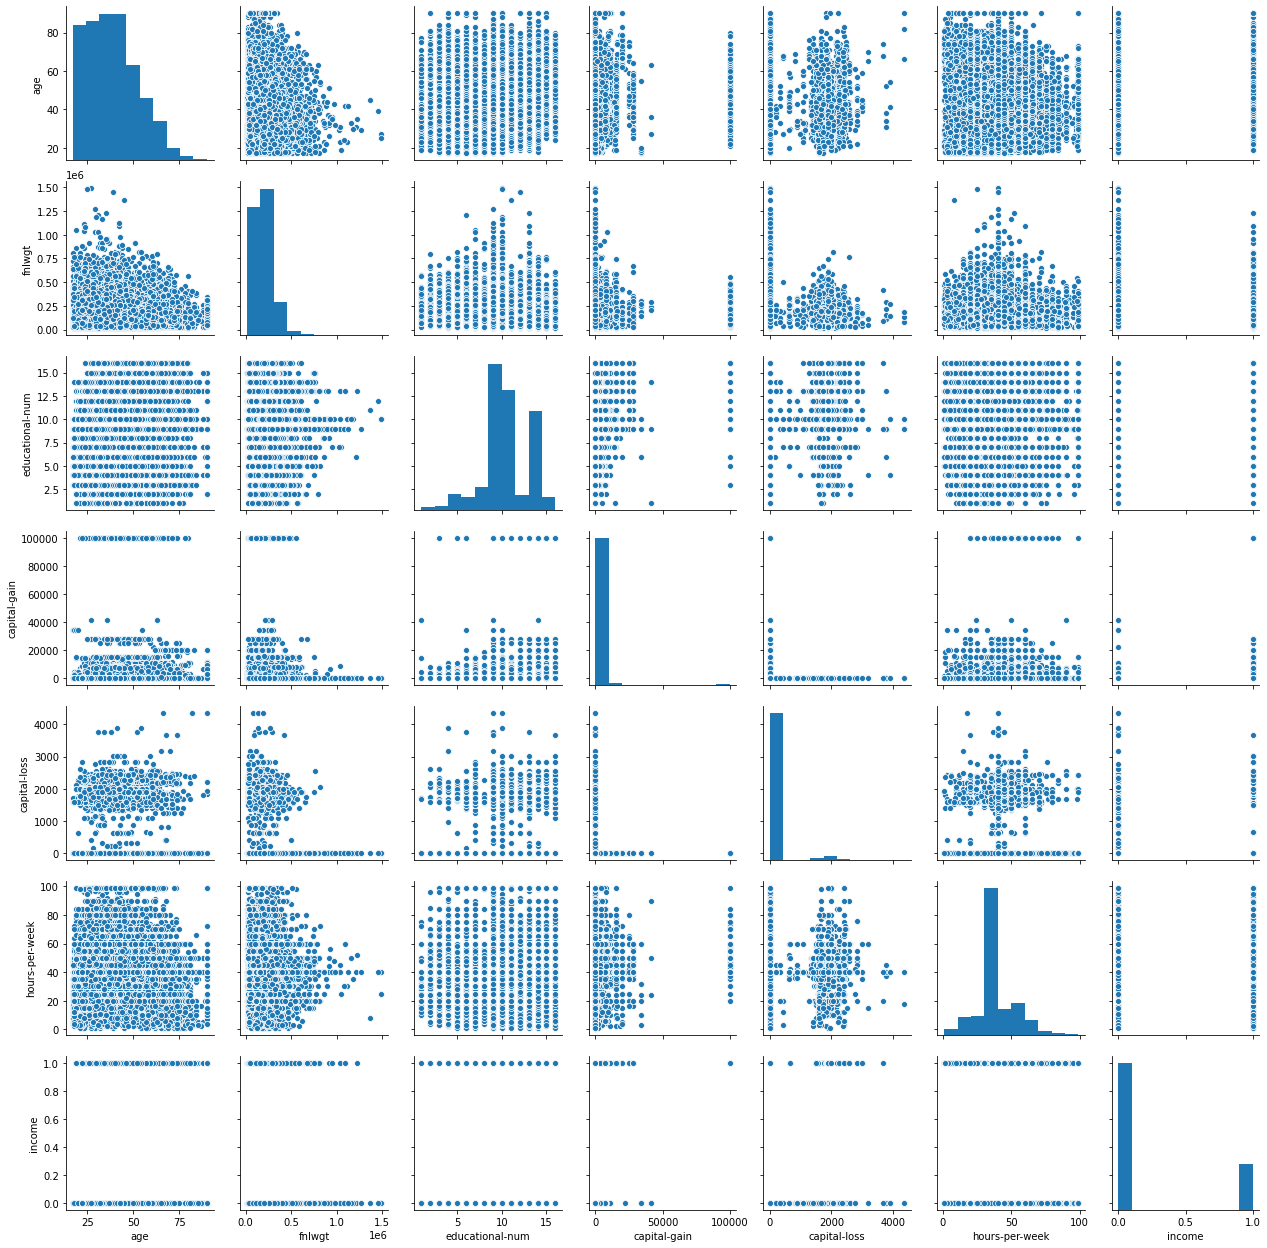

In [29]:
sns.pairplot(df)

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

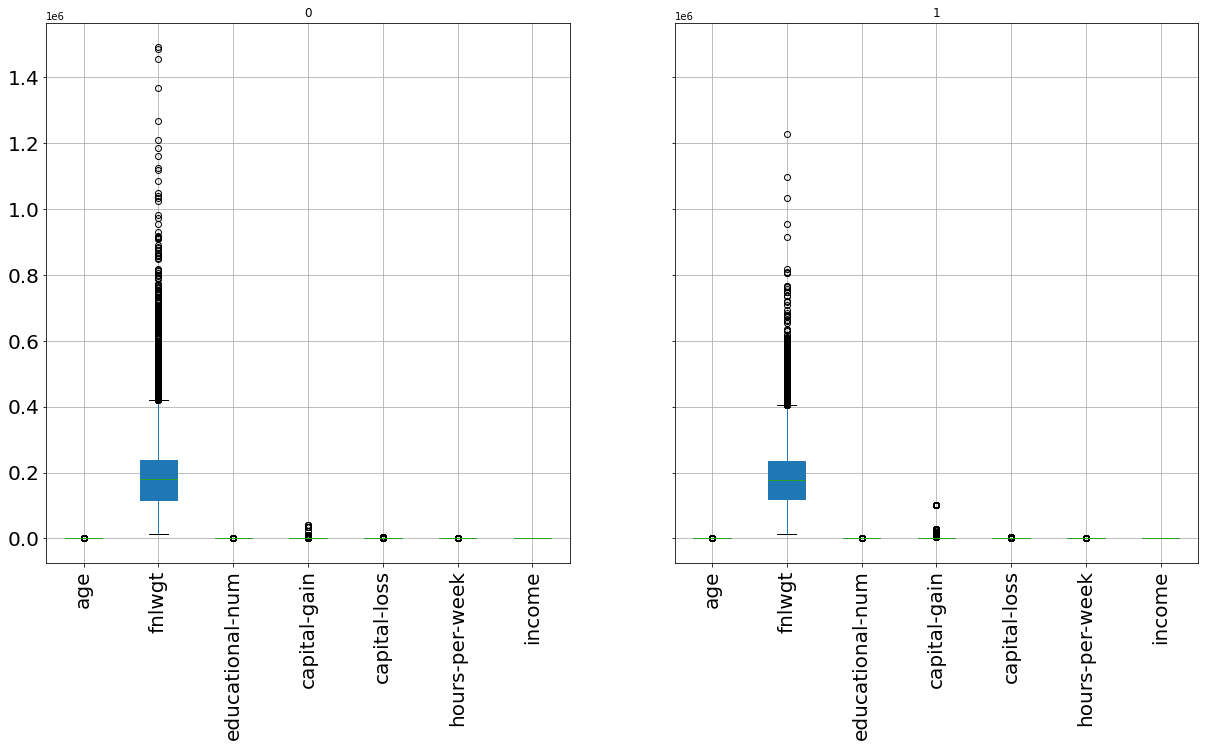

In [30]:
df.groupby('income').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)

In [31]:
def myhist1(x,y):
    plt.hist(list(x[y==0]), color = 'green', alpha = 0.5,label='<=50k')
    plt.hist(list(x[y==1]), color = 'red', alpha = 0.5,label='>50k')
    plt.title(f"{x.name}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

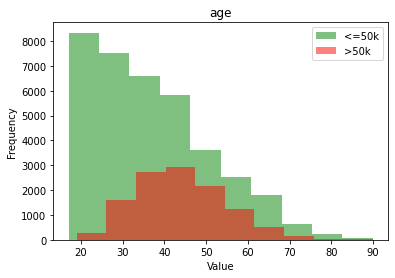

In [32]:
myhist1(X['age'],y)

In [43]:
# Building interactions among features. Useful for the model if 2 or more features added to the model is non -additive or does not overcrowd
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
def add_interactions(df):
    # get feature names
    combos=list(combinations(list(df.columns),2))
    colnames=list(df.columns)+['_'.join(x) for x in combos]
    
    # find interactions
    poly= PolynomialFeatures(interaction_only=True,include_bias=False)
    df=poly.fit_transform(df)
    df=pd.DataFrame(df)
    df.columns= colnames
    
    # Remove Interactions with values 0
    noint_indices = [ i for i, x in enumerate(list((df==0).all())) if x]
    df=df.drop(df.columns[noint_indices],axis=1)
    
    return df

In [44]:
X2 = add_interactions(X)

In [47]:
X2.head() # additional features with more interactions between labels

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,race_Other_native-country_Other,race_Other_native-country_United-States,race_White_gender_Female,race_White_gender_Male,race_White_native-country_Other,race_White_native-country_United-States,gender_Female_native-country_Other,gender_Female_native-country_United-States,gender_Male_native-country_Other,gender_Male_native-country_United-States
0,25.0,226802.0,7.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,38.0,89814.0,9.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,28.0,336951.0,12.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,44.0,160323.0,10.0,7688.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,18.0,103497.0,10.0,0.0,0.0,30.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [48]:
# Dimensionality reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))

In [49]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,37138.149346,-1069.158058,-88.736164,-12.508381,3.450152,2.961200,0.060728,0.552499,0.200528,-0.178825
1,-99849.846043,-1105.158672,-91.037876,1.465066,9.688308,1.403067,-0.900207,-0.198008,-0.601018,0.198699
2,147287.145485,-1040.207444,-86.839995,-8.424330,2.627335,-2.186870,-1.209982,-0.344693,0.460819,0.592086
3,-29342.869347,6601.360796,-76.721967,3.785370,-2.375819,0.351518,-0.778312,-0.218941,0.276738,-0.732320
4,-86166.846289,-1101.567972,-90.878676,-23.202494,-3.996246,-0.261292,0.508773,-0.323691,1.340241,0.492417


In [54]:
# Feature selection and Model Building

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X2,y, train_size=0.70,random_state=1)

In [55]:
print(df.shape)
print(X2.shape)

(48842, 15)
(48842, 1891)


In [56]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(X_train,y_train)
indices_selected=selected_features.get_support(indices=True)
colnames_selected=[X2.columns[i]for i in indices_selected]

X_train_selected=X_train[colnames_selected]
X_test_selected=X_test[colnames_selected]

C:\Users\akars\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 350  663  824  829  834  992 1127 1164 1208 1315 1324 1327 1437 1628
 1631] are constant.
  UserWarning)
C:\Users\akars\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [57]:
colnames_selected

['educational-num',
 'marital-status_Married-civ-spouse',
 'relationship_Husband',
 'age_educational-num',
 'age_marital-status_Married-civ-spouse',
 'age_relationship_Husband',
 'fnlwgt_marital-status_Married-civ-spouse',
 'fnlwgt_relationship_Husband',
 'educational-num_hours-per-week',
 'educational-num_marital-status_Married-civ-spouse',
 'educational-num_relationship_Husband',
 'hours-per-week_marital-status_Married-civ-spouse',
 'hours-per-week_relationship_Husband',
 'marital-status_Married-civ-spouse_relationship_Husband',
 'marital-status_Married-civ-spouse_race_White',
 'marital-status_Married-civ-spouse_gender_Male',
 'marital-status_Married-civ-spouse_native-country_United-States ',
 'relationship_Husband_race_White',
 'relationship_Husband_gender_Male',
 'relationship_Husband_native-country_United-States ']

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score

def find_model_perf(X_train,y_train,X_test,y_test,model):
    model.fit(X_train,y_train)
    y_hat=[x[1] for x in model.predict_proba(X_test)]
    auc=roc_auc_score(y_test,y_hat)
    
    return auc

In [71]:
model= LogisticRegression()
auc_processed= find_model_perf(X_train_selected,y_train,X_test_selected,y_test,model)

C:\Users\akars\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [72]:
print(auc_processed)

0.6823377654215791


In [66]:
for x in model.predict_proba(X_test_selected):
    print(x) 

[0.75947318 0.24052682]
[0.7562959 0.2437041]
[0.84749029 0.15250971]
[0.47373907 0.52626093]
[0.43704333 0.56295667]
[0.4511876 0.5488124]
[0.75915785 0.24084215]
[0.71978177 0.28021823]
[0.48982611 0.51017389]
[0.62190529 0.37809471]
[0.69120851 0.30879149]
[0.33062586 0.66937414]
[0.36796906 0.63203094]
[0.53662621 0.46337379]
[0.75841724 0.24158276]
[0.76314409 0.23685591]
[0.77492905 0.22507095]
[0.86387234 0.13612766]
[0.7552305 0.2447695]
[0.71951108 0.28048892]
[0.45355731 0.54644269]
[0.69113105 0.30886895]
[0.7144131 0.2855869]
[0.84101542 0.15898458]
[0.47014395 0.52985605]
[0.66977747 0.33022253]
[0.6552328 0.3447672]
[0.82095804 0.17904196]
[0.7552305 0.2447695]
[0.34601617 0.65398383]
[0.72935981 0.27064019]
[0.84919882 0.15080118]
[0.62443668 0.37556332]
[0.43623423 0.56376577]
[0.75947318 0.24052682]
[0.49115488 0.50884512]
[0.70751528 0.29248472]
[0.40599503 0.59400497]
[0.76729186 0.23270814]
[0.41036143 0.58963857]
[0.69116987 0.30883013]
[0.46928017 0.53071983]
[0.5

In [74]:
df_unprocessed = df
df_unprocessed=df_unprocessed.dropna(axis=0,how='any')
print(df.shape)
print(df_unprocessed.shape)

(48842, 15)
(48842, 15)


In [75]:
for col_name in df_unprocessed.columns:
    if df_unprocessed[col_name].dtypes not in ['int32','int64','float32','float64']:
        df_unprocessed=df_unprocessed.drop(col_name,1)

In [76]:
X_unprocessed= df_unprocessed.drop('income',1)
y_unprocessed=df_unprocessed.income

In [77]:
X_train_unprocessed, X_test_unprocessed, y_train, y_test = train_test_split( X_unprocessed,y_unprocessed, train_size=0.70,random_state=1)

In [78]:
auc_unprocessed = find_model_perf(X_train_unprocessed,y_train,X_test_unprocessed,y_test,model)

In [79]:
print(auc_unprocessed)

0.5829308817678093


In [80]:
per_improvement = ((auc_processed-auc_unprocessed)/auc_unprocessed)*100

In [81]:
per_improvement

17.05294517118501